In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims

In [8]:
filename=r'/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Slices/202002_Hannah_TNR brain slices/analysis_slices_silvio.CSV'

In [15]:
organelledf=pd.read_csv(filename,sep=';',header='infer')

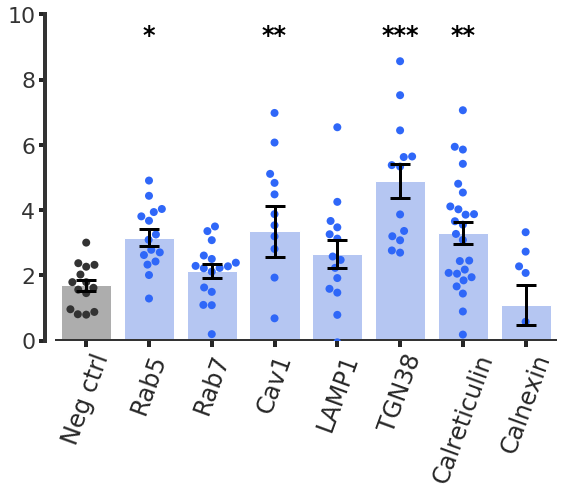

In [29]:
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

df2plot=organelledf
var="coloc"
fig=plt.figure(figsize=(9,6))

order=['Neg ctrl','Rab5',
      'Rab7','Cav1','LAMP1',
       'TGN38',
       'Calreticulin','Calnexin'
       ]

paletteswarm ={'Neg ctrl':"#333333",
               'Rab5':"#2F67F8",
               'Rab7':"#2F67F8",
               'Cav1':"#2F67F8",
               'LAMP1':"#2F67F8",
               'TGN38':"#2F67F8",
              'Calreticulin':"#2F67F8",
               'Calnexin':"#2F67F8"}
palette ={'Neg ctrl':"#adadad",
               'Rab5':"#abc2fc",
               'Rab7':"#abc2fc",
               'Cav1':"#abc2fc",
               'LAMP1':"#abc2fc",
               'TGN38':"#abc2fc",
         'Calreticulin':"#abc2fc",
               'Calnexin':"#abc2fc"}

g=sns.barplot(data=df2plot,y=var,x="Protein"
            ,order=order,palette=palette,ci=None)
g=sns.swarmplot(data=df2plot,y=var,x="Protein",
                palette=paletteswarm,order=order,size=8)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .8)

plt.errorbar(x=np.arange(0,len(order)),
             y=[df2plot[df2plot["Protein"]==condtype][var].mean() for condtype in order],
             yerr=[df2plot[df2plot["Protein"]==condtype][var].sem() for condtype in order],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)

plt.ylim([0,10])
plt.axhline(0, color='#333333',alpha=1,linewidth=4)
g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)
plt.rcParams['font.sans-serif'] = 'Helvetica'
g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)
g.grid(False)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
plt.xticks(g.get_xticks(),order,
           rotation=70,size=24)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=True,trim=trims,offset=offsets)
plt.yticks([0,2,4,6,8,10],fontsize=22,color='#333333')


'''x1, x2 = 8,0
y= 11
h=0.3
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col,size=24, weight='bold')'''


plt.text(5, 9, "***", ha='center', va='bottom', color=col,size=24, weight='bold')
plt.text(6, 9, "**", ha='center', va='bottom', color=col,size=24, weight='bold')
plt.text(3, 9, "**", ha='center', va='bottom', color=col,size=24, weight='bold')

plt.text(1, 9, "*", ha='center', va='bottom', color=col,size=24, weight='bold')


diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'acuteslice_coloc.svg', bbox_inches='tight', format='svg')

In [31]:
dforganelle=organelledf
for protein in dforganelle["Protein"].unique():
    print(protein+'    '+str(len(dforganelle[dforganelle["Protein"]==protein])))

Calreticulin    25
Calnexin    8
Cav1    12
LAMP1    14
Rab5    15
Rab7    16
TGN38    13
Neg ctrl    14
